Force Sensor

In [1]:
import nidaqmx 
import atiiaftt as ati
from nidaqmx.stream_readers import AnalogMultiChannelReader
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
CALFILEPATH = "FT44764\FT44764.cal"
INDEX = 1

read_task = nidaqmx.Task()
read_task.ai_channels.add_ai_voltage_chan("Dev1/ai0")
read_task.ai_channels.add_ai_voltage_chan("Dev1/ai1")
read_task.ai_channels.add_ai_voltage_chan("Dev1/ai2")
read_task.ai_channels.add_ai_voltage_chan("Dev1/ai3")
read_task.ai_channels.add_ai_voltage_chan("Dev1/ai4")
read_task.ai_channels.add_ai_voltage_chan("Dev1/ai5")
reader = AnalogMultiChannelReader(read_task.in_stream,)
values_read = np.zeros(6, dtype=np.float64)

transform = [0,0,0,0,0,0]
bias_val = list()

#Bias
sensor = ati.FTSensor()
cal = sensor.createCalibration(CALFILEPATH, INDEX)
sensor.setForceUnits("N".encode("utf-8"))
sensor.setTorqueUnits("N-m".encode("utf-8"))
sensor.setToolTransform(transform, "mm".encode("utf-8"), "deg".encode("utf-8"))

current_time = time.time()
while time.time() < current_time+0.1:
    reader.read_one_sample(values_read)   
    bias_val.append(sensor.convertToFt(values_read.tolist()))

bias = np.array([0,0,0,0,0,0])
for data in bias_val:
    bias = bias + np.array(data)

bias = [i/len(bias_val) for i in bias]
print(bias)

sensor.bias(bias)
output = sensor.convertToFt(bias)
output


[1.135609006881714, -0.4051036536693573, 1.4838436603546143, -0.04867276772856712, -0.19769408404827118, 0.08639623522758484]


[1.8416998386383057,
 -7.125532627105713,
 61.04011917114258,
 -1.3139666318893433,
 0.36596351861953735,
 0.15236832201480865]

Test Sensor

[1.1371115446090698, -0.37686264514923096, 1.4818074703216553, -0.04834158346056938, -0.19751611351966858, 0.08733699470758438]
[1.1395249366760254, -0.37811681628227234, 1.465248942375183, -0.048237379640340805, -0.19787849485874176, 0.08726219832897186]
[1.141788125038147, -0.3821462094783783, 1.4857358932495117, -0.04841255396604538, -0.1978391706943512, 0.08704470843076706]
[1.1396256685256958, -0.39675790071487427, 1.4774516820907593, -0.048587072640657425, -0.19808395206928253, 0.0871092677116394]
[1.1278431415557861, -0.3846811354160309, 1.4861332178115845, -0.048432379961013794, -0.19809402525424957, 0.08733853697776794]
[1.1324666738510132, -0.3794228732585907, 1.4777756929397583, -0.04824955761432648, -0.19780340790748596, 0.08741135150194168]
[1.1326186656951904, -0.3928009271621704, 1.4735928773880005, -0.04852918162941933, -0.19773563742637634, 0.08754654228687286]
[1.1371427774429321, -0.3953414261341095, 1.4815144538879395, -0.04821068048477173, -0.1981237679719925, 0.08

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\nidaqmx\task.py:97: ResourceWarning: Task of name "_unnamedTask<0>" was not explicitly closed before it was destructed. Resources on the task device may still be reserved.
  warnings.warn(


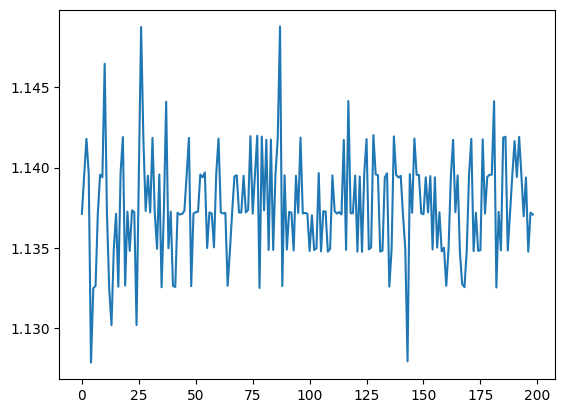

In [3]:
current_time = time.time()
duration = 5
Test_readings = list()

read_task = nidaqmx.Task()
read_task.ai_channels.add_ai_voltage_chan("Dev1/ai0")
read_task.ai_channels.add_ai_voltage_chan("Dev1/ai1")
read_task.ai_channels.add_ai_voltage_chan("Dev1/ai2")
read_task.ai_channels.add_ai_voltage_chan("Dev1/ai3")
read_task.ai_channels.add_ai_voltage_chan("Dev1/ai4")
read_task.ai_channels.add_ai_voltage_chan("Dev1/ai5")
reader = AnalogMultiChannelReader(read_task.in_stream,)
values_read = np.zeros(6, dtype=np.float64)


while time.time() < current_time+duration:
    reader.read_one_sample(values_read)   
    print(sensor.convertToFt(values_read.tolist()))
    Test_readings.append(sensor.convertToFt(values_read.tolist()))

print("Number of Data", len(Test_readings))
plt.plot(range(len(Test_readings)), [data[0] for data in Test_readings])

Initiallize Motor

In [ ]:
import numpy as np
import datetime as dt
import csv
import matplotlib.pyplot as plt
import serial
from time import sleep


ENTER = bytes([0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFC])
EXIT = bytes([0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFD])
ZERO = bytes([0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFE])


# AK70-10 24V Motor Limit
P_MIN = -12.5
P_MAX = 12.5
V_MIN = -50  
V_MAX = 50
T_MIN = -25 
T_MAX = 25
KP_MIN = 0
KP_MAX = 500
KD_MIN = 0
KD_MAX = 5

Function

In [ ]:
def unpack(data):
    id = data[0]
    pos = ((data[1]*(P_MAX-P_MIN))/(pow(2,16)-1)) + P_MIN
    vel = ((data[2]*(V_MAX-V_MIN))/(pow(2,12)-1)) + V_MIN
    tor = ((data[3]*(T_MAX-T_MIN))/(pow(2,12)-1)) + T_MIN
    return id, pos, vel, tor

def receive():
    global dT, q1_old, q2_old
    # Read the response from the serial port
    received = ser.readline().decode().split()      

    # Print the received bytes
    # print("Received:", received)

    try:
        test = int(received[0])
        response = [int(x) for x in received]
        [id, p, v, t] = unpack(response)

        if id == 1:
            p = -round(p,3)
            t = -t
            if dT == 0:
                v = 0
            else:
                v = round((p - q1_old)/dT,2)
        
        else:
            p = round(p,3)
            t = t
            if dT == 0:
                v = 0
            else:
                v = round((p-q2_old)/dT,2)

        # print the response from the Arduino
        # print([id, p, v, t])

    except (IndexError, ValueError):
        id = None
        p = 0
        v = 0
        t = 0
    return id, p, v, t

def pack_cmd(p_des, v_des, t_ff, kp, kd):
    bufs = []
    def float_to_uint(val, val_min, val_max, bits):
        val_norm = (val - val_min) / (val_max - val_min)
        val_int = int(round(val_norm * ((1 << bits) - 1)))
        return val_int
    
    p_int = float_to_uint(p_des, P_MIN, P_MAX, 16)
    v_int = float_to_uint(v_des, V_MIN, V_MAX, 12)
    t_int = float_to_uint(t_ff, T_MIN, T_MAX, 12)
    kp_int = float_to_uint(kp, KP_MIN, KP_MAX, 12)
    kd_int = float_to_uint(kd, KD_MIN, KD_MAX, 12)
    
    bufs.append((p_int >> 8) & 0xFF)
    bufs.append(p_int & 0xFF)
    bufs.append((v_int >> 4) & 0xFF)
    bufs.append(((v_int & 0xF) << 4) | ((kp_int >> 8) & 0xF))
    bufs.append(kp_int & 0xFF)
    bufs.append((kd_int >> 4) & 0xFF)
    bufs.append(((kd_int & 0xF) << 4) | ((t_int >> 8) & 0xF))
    bufs.append(t_int & 0xFF)

    return bufs

Construct Serial Connection

In [ ]:
# open the serial port
ser = serial.Serial('COM4', 115200, timeout=1)


Set Zero

In [ ]:
print("Begining")


q1_old = 0
pos2_old = 0
dT = 0

#M1
print("Starting Zero Position M1")
ser.write(bytes([0x01])+ZERO)
sleep(3)
[id, p, v, t] = receive()
p = 5
while abs(p) >= 0.001:
    ser.write(bytes([0x01])+ZERO)
    sleep(3)
    [id, p, v, t] = receive()



#M2
print("Starting Zero Position M2")
ser.write(bytes([0x02])+ZERO)
sleep(3)
[id, p, v, t] = receive()
p = 5
while abs(p) >= 0.001:
    ser.write(bytes([0x02])+ZERO)
    sleep(3)
    [id, p, v, t] = receive()

print("Finishing Zero Position")


Enter Motor and Re-bias Force Sensor

In [ ]:
##Motor

dT = 0

#M1
print("Starting Enter Motors")
ser.write(bytes([0x01])+ENTER)
[id, p, v, t] = receive()
if id == 1:
    q1 = p
    vel1 = v

elif id == 2:
    q2 = p
    vel2 = v

#M2
ser.write(bytes([0x02])+ENTER)
[id, p, v, t] = receive()

if id == 1:
    q1 = p
    vel1 = v

elif id == 2:
    q2 = p
    vel2 = v

q1_old = q1
q2_old = q2


##Sensor

with nidaqmx.Task() as task:
    task.ai_channels.add_ai_voltage_chan("Dev1/ai0")
    task.ai_channels.add_ai_voltage_chan("Dev1/ai1")
    task.ai_channels.add_ai_voltage_chan("Dev1/ai2")
    task.ai_channels.add_ai_voltage_chan("Dev1/ai3")
    task.ai_channels.add_ai_voltage_chan("Dev1/ai4")
    task.ai_channels.add_ai_voltage_chan("Dev1/ai5")
    
    bias = task.read()

sensor.bias(bias)

Running

In [ ]:
start_time = dt.datetime.today().timestamp()
t = 0
l1 = 0.275
l2 = 0.24
l4 = 0.01
q0 = np.deg2rad(18)
logs = list()
motor_logs = list()
readings = list()

t_mapping = 1/1.35

x = l1*np.sin(q1) + l2*np.cos(q2)
y = l1*np.cos(q1) - l2*np.sin(q2)

time = 0
record_duration = 20

print("Start Controling")
while time < record_duration:
    start_time = dt.datetime.today().timestamp()

    log = list()
    log.append(time)

    q1_old = q1
    q2_old = q2

    x_old = x
    y_old = y


    T1 = 0
    T2 = 0

    
    
    log.append(T1)
    log.append(T2)


    command1 = bytes(pack_cmd(0,0,-T1*t_mapping,0,0)) #(pos,vel,torque,kp,kd)
    command2 = bytes(pack_cmd(0,0,T2*t_mapping,0,0)) #(pos,vel,torque,kp,kd)

    #M1
    ser.write(bytes([0x01])+command1)
    [id, p, v, t] = receive()

    if id == 1:
        q1 = p
        vel1 = v
        t1 = t/t_mapping
    
    elif id == 2:
        q2 = p
        vel2 = v
        t2 = t/t_mapping

    #M2
    ser.write(bytes([0x02])+command2)
    [id, p, v, t] = receive()

    if id == 1:
        q1 = p
        vel1 = v
        t1 = t/t_mapping
    
    elif id == 2:
        q2 = p
        vel2 = v
        t2 = t/t_mapping

    log.append(t1)
    log.append(t2)

    log.append(q1)
    log.append(q2)

    x = l1*np.sin(q1) + l2*np.cos(q2)
    y = l1*np.cos(q1) - l2*np.sin(q2)

    log.append(x)
    log.append(y)

    if time!= 0:
        x_dot = (x-x_old)/dT
        y_dot = (y-y_old)/dT
    
    else:
        x_dot = 0
        y_dot = 0

    log.append(x_dot)
    log.append(y_dot)

    #Estimate CF
    A = q0-q1+2*q2
    B = q0-q1
    C = q0-2*q1+q2
    D = q0+q2
    Fx = -((T1*l2*(np.sin(A)+np.sin(B))+T2*l1*(np.sin(C)-np.sin(D)))/(l1*l2*(np.sin(q0)+np.sin(q0-2*q1+2*q2))))
    Fy = (T1*l2*(np.cos(B)+np.cos(C))+T2*l1*(np.cos(D)-np.cos(A))/(l1*l2*(np.sin(q0)+np.sin(q0-2*q1+2*q2))))    

    log.append(Fx)
    log.append(Fy)

    motor_logs.append(log)


    #Sensor
    with nidaqmx.Task() as task:
        task.ai_channels.add_ai_voltage_chan("Dev1/ai0")
        task.ai_channels.add_ai_voltage_chan("Dev1/ai1")
        task.ai_channels.add_ai_voltage_chan("Dev1/ai2")
        task.ai_channels.add_ai_voltage_chan("Dev1/ai3")
        task.ai_channels.add_ai_voltage_chan("Dev1/ai4")
        task.ai_channels.add_ai_voltage_chan("Dev1/ai5")
        reading = sensor.convertToFt(task.read())

  
    #print(reading)
    
    readings.append(reading)

    log.append(-reading[0])
    log.append(-reading[1])

    logs.append(log)
    
    # print("Progress", f'{round(time/record_duration*100,3)}%')
    dT = dt.datetime.today().timestamp()-start_time
    time+= dT

ser.write(bytes([0x01])+EXIT)
receive()

#M2
ser.write(bytes([0x02])+EXIT)
receive()
    

print("finish")
# print(logs)


Emergency Exit

In [ ]:
ser.write(bytes([0x01])+EXIT)
receive()

#M2
ser.write(bytes([0x02])+EXIT)
receive()


In [ ]:
##readings

print("Data Sample Size", len(readings))
COLUMNS = ["Force X", "Force Y", "Force Z", "Torque X", "Torque Y", "Torque Z"]
readings
arrays = np.array([np.array(item) for item in readings])

arrays_transpose = arrays.transpose()
df = pd.DataFrame([])
for i in range(len(COLUMNS)):
    df[COLUMNS[i]] = arrays_transpose[i]

print(df)


##logs
print(logs)
logs_COLUMNS = ["Time", "T1", "T2", "t1", "t2", "q1", "q2", "x", "y", "x_dot", "y_dot", "Fx", "Fy", "Fx_Mea", "Fy_Mea"]

logs_arrays = np.array([np.array(item) for item in logs])

logs_arrays_transpose = logs_arrays.transpose()
df_log = pd.DataFrame([])
for i in range(len(logs_COLUMNS)):
    df_log[logs_COLUMNS[i]] = logs_arrays_transpose[i]

print(df_log)

In [ ]:
df_log.to_csv("Joey/Record_Data/Sensor_1.csv")

In [ ]:
X = df_log.index
Y = df_log["Fx"]
plt.plot(X, Y, label="log")
plt.grid()
plt.plot(X, df_log["Fx_Mea"], label="Fx_mea")
plt.legend()